In [130]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV
# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [131]:
data = pd.read_csv('/content/german_credit_dataset.csv')
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [133]:
data = pd.read_csv("/content/german_credit_dataset.csv")

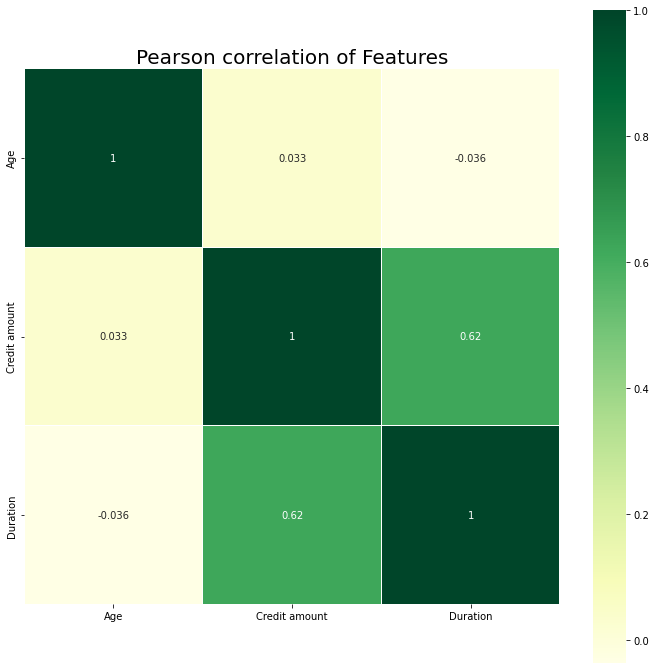

In [134]:
corr = data.corr()
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Pearson correlation of Features", y=1.05, size=20)
plt.show()

In [135]:
###Fill nan

data['Saving accounts'] = data['Saving accounts'].fillna('no_inf')
data['Checking account'] = data['Checking account'].fillna('no_inf')

In [136]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["Risk"]
print("Shape of Y:", data_y.shape)

Shape of X: (1000, 9)
Shape of Y: (1000,)


In [137]:
cat_col = [col for col in data_x.columns if data_x[col].dtypes=='object']
cat_col

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [138]:
from sklearn.preprocessing import OneHotEncoder
cat_cols_encoded = []
for col in cat_col:
    cat_cols_encoded += [f"{col[0:3]}_{cat}" for cat in list(data_x[col].unique())]
cat_cols_encoded

['Sex_male',
 'Sex_female',
 'Job_skilled',
 'Job_unskilled and resident',
 'Job_highly skilled',
 'Job_unskilled and non-resident',
 'Hou_own',
 'Hou_free',
 'Hou_rent',
 'Sav_no_inf',
 'Sav_little',
 'Sav_quite rich',
 'Sav_rich',
 'Sav_moderate',
 'Che_little',
 'Che_moderate',
 'Che_no_inf',
 'Che_rich',
 'Pur_radio/TV',
 'Pur_education',
 'Pur_furniture/equipment',
 'Pur_car',
 'Pur_business',
 'Pur_domestic appliances',
 'Pur_repairs',
 'Pur_vacation/others']

In [139]:
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = oh_encoder.fit_transform(data_x[cat_col])
data_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
data_X =data_x.join(data_enc)
data_X = data_X.drop(cat_col, axis=1)
data_X

,Age,Credit amount,Duration,Sex_male,Sex_female,Job_skilled,Job_unskilled and resident,Job_highly skilled,Job_unskilled and non-resident,Hou_own,...,Che_no_inf,Che_rich,Pur_radio/TV,Pur_education,Pur_furniture/equipment,Pur_car,Pur_business,Pur_domestic appliances,Pur_repairs,Pur_vacation/others
0,67,1169,6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,5951,48,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,2096,12,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,7882,42,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,4870,24,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1736,12,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,40,3857,30,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,38,804,12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,23,1845,45,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_X)
scaled_ds = pd.DataFrame(scaler.transform(data_X),columns=data_X.columns)
print("All features are now scaled")

All features are now scaled


In [141]:

from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(scaled_ds, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (640, 29)
X CV: (160, 29)
X Test: (200, 29)
Y Train: (640,)
Y CV: (160,)
Y Test: (200,)


In [142]:
y_train.replace({"bad":0, "good":1}, inplace=True)
y_test.replace({"bad":0, "good":1}, inplace=True)
y_cv.replace({"bad":0, "good":1}, inplace=True)

In [143]:
# Import the libraries
import os
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV


%matplotlib inline

AUC for k =  1.0 is 0.6695487974557742
AUC for k =  2.0 is 0.725402504472272
AUC for k =  3.0 is 0.7388193202146691
AUC for k =  4.0 is 0.7813555953090837
AUC for k =  5.0 is 0.7794673027231166
AUC for k =  6.0 is 0.7531305903398927
AUC for k =  7.0 is 0.7614788312462731
AUC for k =  8.0 is 0.7701252236135957
AUC for k =  9.0 is 0.7361359570661896
AUC for k =  10.0 is 0.7035380640031803
AUC for k =  11.0 is 0.6924070761280064
AUC for k =  12.0 is 0.7045319022063209
AUC for k =  13.0 is 0.7316636851520572
AUC for k =  14.0 is 0.7246074339097596
AUC for k =  15.0 is 0.6932021466905188
AUC for k =  16.0 is 0.7344464321208507
AUC for k =  17.0 is 0.7296760087457761
AUC for k =  18.0 is 0.7254025044722718
AUC for k =  19.0 is 0.734943351222421
AUC for k =  20.0 is 0.6999602464718744


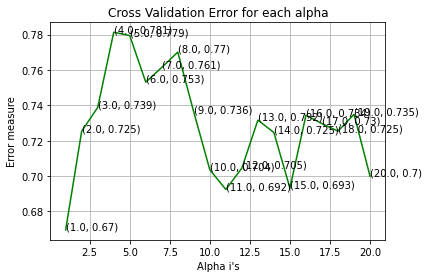

For values of best alpha =  4.0 The train AUC is: 0.8405315807165792
For values of best alpha =  4.0 The cross validation AUC is: 0.776187636652753
For values of best alpha =  4.0 The test AUC is: 0.7609719669117646


In [144]:
alpha = np.linspace(1, 20, 20, endpoint=True)
cv_auc_array=[]
for i in alpha:
    DeTree=DecisionTreeClassifier(max_depth=i)
    DeTree.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(DeTree, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

DeTree=DecisionTreeClassifier(max_depth=alpha[best_alpha])
DeTree.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(DeTree, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))


In [145]:
clf_tree = DecisionTreeClassifier(max_depth=alpha[best_alpha])
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
acc_1 = accuracy_score(y_test, y_pred_tree)
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score3 = clf_tree.predict_proba(X_train)[:,1]

AUC for k =  1e-05 is 0.708606638839197
AUC for k =  0.0001 is 0.7090041741204531
AUC for k =  0.001 is 0.7097992446829656
AUC for k =  0.01 is 0.7099980123235938
AUC for k =  0.1 is 0.7099980123235937
AUC for k =  1 is 0.7099980123235937
AUC for k =  10 is 0.7097992446829656
AUC for k =  100 is 0.7097992446829656
AUC for k =  1000 is 0.7097992446829656


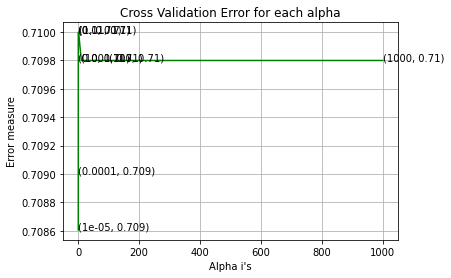

For values of best alpha =  0.01 The train AUC is: 0.7806678953530155
For values of best alpha =  0.01 The cross validation AUC is: 0.7099980123235938
For values of best alpha =  0.01 The test AUC is: 0.7902113970588235


In [146]:
#Logistics
alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf_1 = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf_1.fit(X_train, y_train)
    
predict_y = sig_clf_1.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf_1.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf_1.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))



In [147]:
clf_reg = LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
clf_reg.fit(X_train, y_train)
y_pred_reg = clf_reg.predict(X_test)
acc_2 = accuracy_score(y_test, y_pred_reg)
y_score2 = clf_reg.predict_proba(X_test)[:,1]
y_score4 = clf_reg.predict_proba(X_train)[:,1]

In [148]:
# Test Dataset
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

In [149]:
# Train Dataset
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_train, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_train, y_score4)

In [150]:
print('roc_auc_score for DecisionTree of test set: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression of test set: ', roc_auc_score(y_test, y_score2))
print('\n')
print('roc_auc_score for DecisionTree of train set: ', roc_auc_score(y_train, y_score3))
print('roc_auc_score for Logistic Regression of train set: ', roc_auc_score(y_train, y_score4))

roc_auc_score for DecisionTree of test set:  0.723920036764706
roc_auc_score for Logistic Regression of test set:  0.7889476102941176


roc_auc_score for DecisionTree of train set:  0.7978405257850262
roc_auc_score for Logistic Regression of train set:  0.7810388195337947


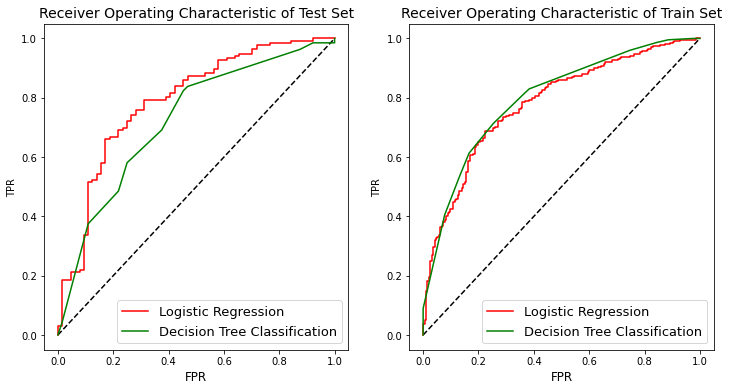

In [151]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax1.plot([0,1],[0,1], 'k--', color='black')
ax1.plot(false_positive_rate2, true_positive_rate2, label= "Logistic Regression", color='red')
ax1.plot(false_positive_rate1, true_positive_rate1, label= "Decision Tree Classification", color='green')
ax1.legend(fontsize=13)
ax1.set_xlabel("FPR", fontsize=12)
ax1.set_ylabel("TPR")
ax1.set_title('Receiver Operating Characteristic of Test Set', fontsize=14)

ax2.plot([0,1],[0,1], 'k--', color='black')
ax2.plot(false_positive_rate4, true_positive_rate4, label= "Logistic Regression", color='red')
ax2.plot(false_positive_rate3, true_positive_rate3, label= "Decision Tree Classification", color='green')
ax2.legend(fontsize=13)
plt.xlabel("FPR", fontsize=12)
plt.ylabel("TPR")
ax2.set_title('Receiver Operating Characteristic of Train Set', fontsize=14)
plt.show()

In [152]:
importance = clf_reg.coef_[0]

In [153]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1000 non-null   int64  
 1   Credit amount                   1000 non-null   int64  
 2   Duration                        1000 non-null   int64  
 3   Sex_male                        1000 non-null   float64
 4   Sex_female                      1000 non-null   float64
 5   Job_skilled                     1000 non-null   float64
 6   Job_unskilled and resident      1000 non-null   float64
 7   Job_highly skilled              1000 non-null   float64
 8   Job_unskilled and non-resident  1000 non-null   float64
 9   Hou_own                         1000 non-null   float64
 10  Hou_free                        1000 non-null   float64
 11  Hou_rent                        1000 non-null   float64
 12  Sav_no_inf                      100

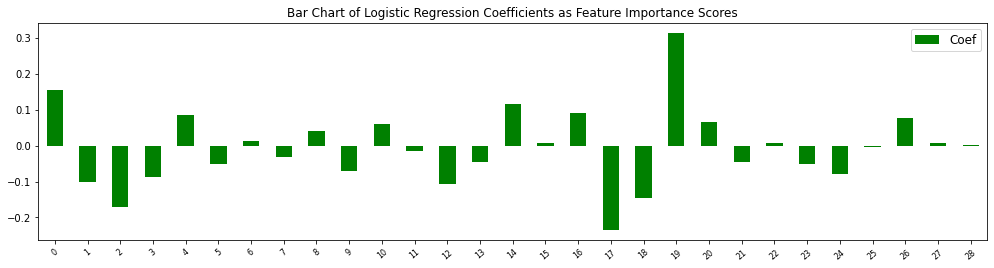

In [154]:
import_df = pd.DataFrame(importance, columns=['Coef'])
ax = import_df.plot(kind='bar', figsize=(17,4), color= 'green')
plt.title('Bar Chart of Logistic Regression Coefficients as Feature Importance Scores')
plt.legend(fontsize=12)
plt.xlabel("age").set_visible(False)
plt.xticks(fontsize=8, rotation=40)
plt.show()